## Linear Regression ML algorithm

### Predicting house prices

In [1]:
# importing resources
import pandas as pd
import numpy as np


In [2]:
# Load data
path = r"C:\DS\house_price\Bengaluru_House_Data.csv"
df = pd.read_csv(path)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# data cleaning
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
# total sqft should be float/int
# let us see some stats
df.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [5]:
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [6]:
# society has a lot of missing values - let us drop society column
df.drop(['society'], axis=1, inplace=True)

In [7]:
# for other columns we can either drop rows with missing values or impute values
# let us impute for balcony - numerical variable, and drop remining rows with missing values
# for balcony, let us impute based on another variable - size
# using for loop to do this for all classes of size with update option
df_copy = df.copy()
for var in df['size'].unique():
    mean_val = df[df.loc[:, 'size'] == var]['balcony'].mean()
    df_copy.update(df[df.loc[:, 'size'] == var]['balcony'].replace(np.nan, mean_val))

In [8]:
(df_copy.isna().sum() / len(df)) * 100

area_type       0.000000
availability    0.000000
location        0.007508
size            0.120120
total_sqft      0.000000
bath            0.548048
balcony         0.157658
price           0.000000
dtype: float64

In [9]:
# most of the balcony values have been imputed based on size class's mean
# we can remove remaining rows with missing values
print('shape of previous set is', df_copy.shape)
df_copy.dropna(inplace=True)
print('shape of new set is', df_copy.shape)

shape of previous set is (13320, 8)
shape of new set is (13241, 8)


In [10]:
(df_copy.isna().sum() / len(df)) * 100

area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64

In [11]:
# very few rows removed - we have a non missing dataset now
df_copy.describe(include = "all")

,area_type,availability,location,size,total_sqft,bath,balcony,price
count,13241,13241,13241,13241,13241,13241.000000,13241.000000,13241.000000
unique,4,80,1301,27,2067,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,1200,NaN,NaN,NaN
freq,8736,10560,534,5198,842,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.688015,1.592278,112.286450
std,NaN,NaN,NaN,NaN,NaN,1.320138,0.803514,148.974386
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [12]:
# total sqft should be numerical variable - need to clean
# viewing all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# viewing col in question
df2 = df_copy['total_sqft']
df2.tail(100)

13219           1590
13220            520
13221           1178
13222           1360
13223           1155
13224            520
13225           1615
13226           6000
13227           1140
13228           1508
13229           2395
13230           1590
13231           2215
13232           1667
13233           1903
13234           1530
13235           1730
13236           1048
13237           1225
13238           1200
13239           1175
13241           1651
13242           1500
13243           1783
13244           1015
13245           1800
13246           2758
13247           1200
13248           1132
13249           1200
13250           1490
13251           1917
13252           1703
13253           1211
13254           1310
13255           1146
13256           1041
13257           1453
13258            877
13259           1477
13260           1420
13261           2000
13262           1140
13263           1380
13264           1095
13265    1133 - 1384
13266           1665
13267        

In [13]:
df2.columns = ['total_sqft']

In [14]:
# after eyeballing data - it contains numbers and alphabets - need to separate (diff units)
df3 = df2.str.extract('(\d+\.?\d*)([A-Za-z]*)', expand = True)
df3.head()


,0,1
0,1056,
1,2600,
2,1440,
3,1521,
4,1200,


In [15]:
df3[1].unique()

array(['', 'Sq', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds'],
      dtype=object)

In [16]:
# these are diff units
# let us see how many we have here
(df3.isna().sum() / len(df)) * 100

0    0.0
1    0.0
dtype: float64

In [18]:
# it shows no missing values - but we see there are - maybe the spaces need to be replaced
df4 = df3.replace(r'^\s*$', np.nan, regex=True)
(df4.isna().sum() / len(df)) * 100

0     0.000000
1    99.061562
dtype: float64

In [19]:
# only 0.94% of data has text in it - we can delete it later
# first looking at numeric column if it is clean
df4[0] = df4[0].astype(float)

In [20]:
# yes it is clean - now merge with original first
df_copy['area_sqft'] = df4[0]
df_copy['area_sqft_string'] = df4[1]

In [21]:
# now we can delete rows where there are non missing values in df_copy['area_sqft_string']
df5 = df_copy[df_copy['area_sqft_string'].isnull()]
df5.drop(['area_sqft_string', 'total_sqft'], axis=1, inplace=True)
(df5.isna().sum() / len(df)) * 100

C:\Users\jaska\AppData\Local\Temp\ipykernel_29932\4091646007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['area_sqft_string', 'total_sqft'], axis=1, inplace=True)


area_type       0.0
availability    0.0
location        0.0
size            0.0
bath            0.0
balcony         0.0
price           0.0
area_sqft       0.0
dtype: float64

In [22]:
df5.describe(include="all")

,area_type,availability,location,size,bath,balcony,price,area_sqft
count,13195,13195,13195,13195,13195.000000,13195.000000,13195.000000,13195.000000
unique,4,80,1295,27,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,NaN,NaN,NaN,NaN
freq,8725,10521,532,5192,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.686548,1.593499,112.172834,1552.204269
std,NaN,NaN,NaN,NaN,1.317423,0.803049,149.073465,1230.987344
min,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000,1.000000
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000,1100.000000
50%,NaN,NaN,NaN,NaN,2.000000,2.000000,71.740000,1272.000000
75%,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000,1670.000000


In [23]:
# let us look at availability, location, and size
df5['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [24]:
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom', '13 BHK'],
      dtype=object)

In [25]:
df5['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [26]:
df5['location'].head(100)

0       Electronic City Phase II
1               Chikka Tirupathi
2                    Uttarahalli
3             Lingadheeranahalli
4                       Kothanur
5                     Whitefield
6               Old Airport Road
7                   Rajaji Nagar
8                   Marathahalli
9                   Gandhi Bazar
10                    Whitefield
11                    Whitefield
12            7th Phase JP Nagar
13                     Gottigere
14                      Sarjapur
15                   Mysore Road
16                 Bisuvanahalli
17         Raja Rajeshwari Nagar
18         Ramakrishnappa Layout
19            Manayata Tech Park
20                       Kengeri
21                    Binny Pete
22                   Thanisandra
23                     Bellandur
24                   Thanisandra
25               Mangammanapalya
26               Electronic City
27                    Whitefield
28              Ramagondanahalli
29               Electronic City
30        

In [27]:
# getting frequency of unique values
check = df5['location'].value_counts()

In [28]:
check.describe()

count    1295.000000
mean       10.189189
std        29.379659
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       532.000000
Name: location, dtype: float64

In [29]:
# let us  include all locations for now - get dummy
df6 = pd.get_dummies(df5, drop_first=True)
df6.head()

,bath,balcony,price,area_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jan,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Feb,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Nov,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Feb,availability_20-Jan,availability_20-Jul,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Aug,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Sector 1 HSR Layout,location_ Thanisandra,location_ Whitefield,location_ ittamadu,location_ south,location_1 Annasandrapalya,location_1 Giri Nagar,location_1 Immadihalli,location_1 Ramamurthy Nagar,location_12th cross srinivas nagar banshankari 3rd stage,location_1A Block Koramangala,location_1Channasandra,location_1Hoysalanagar,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Domlur,location_1st Stage Indira Nagar,location_1st Stage Radha Krishna Layout,location_2Electronic City Phase II,location_2nd Block Bel Layout,location_2nd Block Hbr Layout,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Block Koramangala,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,"location_2nd phase jp nagar, jp nagar",location_3rd Block Banashankari,location_3rd Block HBR Layout,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase Iti Layout,location_3rd Phase JP Nagar,location_3rd Stage Raja Rajeshwari Nagar,location_4 Bedroom Farm House in Bagalur,location_4th Block HBR Layout,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Block Jayanagar,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_5th block Koramangala,location_6th Block Jayanagar,location_6th Block Rajaji Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,"location_6th block banashankari 3rd stage, 100 feet ORR",location_7th Block Jayanagar,location_7th Block Koramangala,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS LAYOUT A-BLOCK Singasandra,location_AECS Layout,location_AGB Layout,location_AGS Layout,location_

In [30]:
# splittin x y
x = df6.drop(['price'], axis=1)
y = df6['price']

In [31]:
print('shape of x: ', x.shape)
print('shape of y: ', y.shape)

shape of x:  (13195, 1405)
shape of y:  (13195,)


In [32]:
# train test split
from sklearn.model_selection import train_test_split as tts
xtr, xt, ytr, yt = tts(x, y, test_size=0.2, random_state=108)
print('shape of x train: ', xtr.shape)
print('shape of y train: ', ytr.shape)
print('shape of x test: ', xt.shape)
print('shape of y test: ', yt.shape)

shape of x train:  (10556, 1405)
shape of y train:  (10556,)
shape of x test:  (2639, 1405)
shape of y test:  (2639,)


### Feature Scaling - since many values have very varied ranges - not good for ML algorithms

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtr)
xtr = sc.transform(xtr)
xt = sc.transform(xt) # we do not transform the response

In [34]:
# checking
xtr

array([[-0.51403596,  0.5070568 , -0.38868338, ..., -0.07932028,
        -0.02176899, -0.05514226],
       [ 0.23533065, -0.73712778,  0.18541768, ..., -0.07932028,
        -0.02176899, -0.05514226],
       [-1.26340257, -0.73712778, -0.48589783, ..., -0.07932028,
        -0.02176899, -0.05514226],
       ...,
       [ 1.73406387,  0.5070568 , -0.27386317, ..., -0.07932028,
        -0.02176899, -0.05514226],
       [-1.26340257, -0.73712778, -0.68262313, ..., -0.07932028,
        -0.02176899, -0.05514226],
       [ 1.73406387,  0.5070568 , -0.27386317, ..., -0.07932028,
        -0.02176899, -0.05514226]])

### Linear Regresison Model

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # for both simple and multiple linear regression
lr.fit(xtr, ytr) # training

LinearRegression()

In [36]:
# checking coefficients (slopes)
lr.coef_

array([38.11288229,  0.75188533, 49.26064338, ..., -7.95507812,
       -7.84375   , -3.88818359])

In [37]:
# checking intercept
lr.intercept_

112.15361659768767

In [38]:
# testing for one value - 1st value
lr.predict([xt[0, :]])

array([54.62334316])

In [39]:
# checking price of 1st variable
yt.head()

8483      33.0
7565      57.9
11565     89.0
10564    161.0
12444     36.0
Name: price, dtype: float64

In [40]:
# it is 33 lakhs - price is off by a few lakhs
# let us see overall score
lr.score(xt, yt)

-5.81831398165562e+24

In [41]:
# this is very poor score - let us fix by removing some variables that might be causing this
# unbalanced variables - e.g. a observation with only 1 location, etc.
df5.head()

,area_type,availability,location,size,bath,balcony,price,area_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,51.00,1200.0


In [42]:
# checking availability
df5['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [43]:
# these are just dates - we can impute as not ready to move
df5.loc[df5['availability'] != 'Ready To Move', 'availability'] = 'Not Yet Ready'

In [44]:
df5['availability'].value_counts()

Ready To Move    10521
Not Yet Ready     2674
Name: availability, dtype: int64

In [45]:
# dropping location
df5.drop(['location'], axis=1, inplace=True)

C:\Users\jaska\AppData\Local\Temp\ipykernel_29932\1690251046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['location'], axis=1, inplace=True)


In [46]:
# checking size column
df5['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom', '13 BHK'],
      dtype=object)

In [47]:
# Bedroom = BHK, also this should be numeric
bdrm = df5['size'].str.split(' ', expand = True)
bdrm.head()


,0,1
0,2,BHK
1,4,Bedroom
2,3,BHK
3,3,BHK
4,2,BHK


In [48]:
# checking
bdrm.dtypes

0    object
1    object
dtype: object

In [49]:
# converting
bdrm = bdrm[0].astype(int)

In [50]:
# merging back with dataset
df5['bedrooms'] = bdrm

C:\Users\jaska\AppData\Local\Temp\ipykernel_29932\2984900581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['bedrooms'] = bdrm


In [51]:
df5.drop(['size'], axis=1, inplace=True)

C:\Users\jaska\AppData\Local\Temp\ipykernel_29932\1539720398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['size'], axis=1, inplace=True)


In [52]:
df5.dtypes

area_type        object
availability     object
bath            float64
balcony         float64
price           float64
area_sqft       float64
bedrooms          int32
dtype: object

In [53]:
df5.describe(include="all")

,area_type,availability,bath,balcony,price,area_sqft,bedrooms
count,13195,13195,13195.000000,13195.000000,13195.000000,13195.000000,13195.000000
unique,4,2,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,NaN,NaN,NaN,NaN,NaN
freq,8725,10521,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.686548,1.593499,112.172834,1552.204269,2.796362
std,NaN,NaN,1.317423,0.803049,149.073465,1230.987344,1.270275
min,NaN,NaN,1.000000,0.000000,8.000000,1.000000,1.000000
25%,NaN,NaN,2.000000,1.000000,50.000000,1100.000000,2.000000
50%,NaN,NaN,2.000000,2.000000,71.740000,1272.000000,3.000000
75%,NaN,NaN,3.000000,2.000000,120.000000,1670.000000,3.000000


In [54]:
# checking price where 43 bedrooms - is it outlier?
df5.loc[df5['bedrooms']==43]

,area_type,availability,bath,balcony,price,area_sqft,bedrooms
4684,Plot Area,Ready To Move,40.0,0.0,660.0,2400.0,43


In [55]:
# seems ok
# now fitting the model again
# let us get dummies
df6 = pd.get_dummies(df5, drop_first=True)
df6.head()



,bath,balcony,price,area_sqft,bedrooms,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move
0,2.0,1.0,39.07,1056.0,2,0,0,1,0
1,5.0,3.0,120.00,2600.0,4,0,1,0,1
2,2.0,3.0,62.00,1440.0,3,0,0,0,1
3,3.0,1.0,95.00,1521.0,3,0,0,1,1
4,2.0,1.0,51.00,1200.0,2,0,0,1,1


In [56]:
# splittin x y
x = df6.drop(['price'], axis=1)
y = df6['price']

In [57]:
# train test split
# from sklearn.model_selection import train_test_split as tts
xtr, xt, ytr, yt = tts(x, y, test_size=0.2, random_state=108)
print('shape of x train: ', xtr.shape)
print('shape of y train: ', ytr.shape)
print('shape of x test: ', xt.shape)
print('shape of y test: ', yt.shape)

shape of x train:  (10556, 8)
shape of y train:  (10556,)
shape of x test:  (2639, 8)
shape of y test:  (2639,)


In [58]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtr)
xtr = sc.transform(xtr)
xt = sc.transform(xt) # we do not transformthe response

In [59]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression() # for both simple and multiple linear regression
lr.fit(xtr, ytr) # training

LinearRegression()

In [60]:
lr.score(xt, yt)

0.4779582523486068

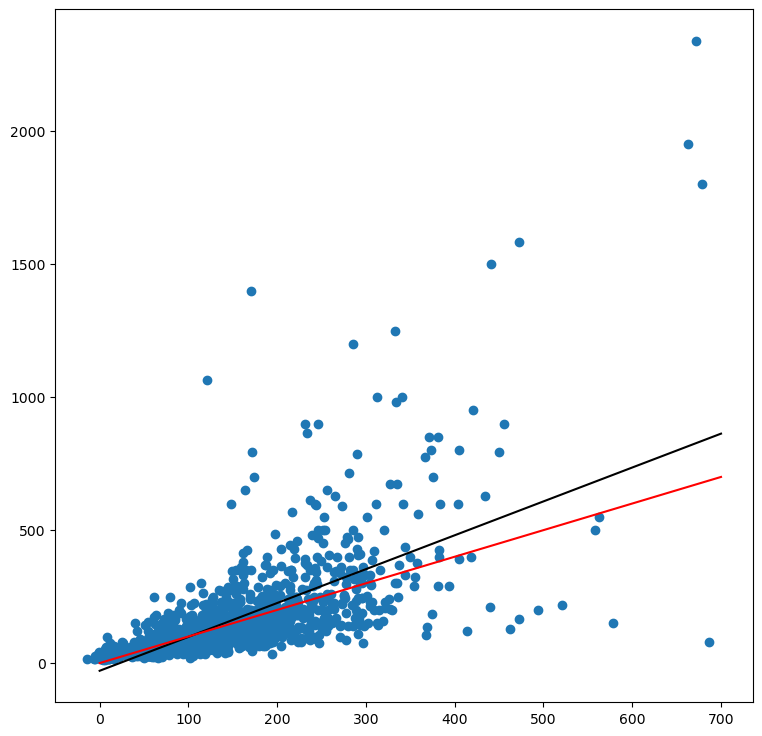

In [61]:
# poor prediction but better than before
# plotting
import matplotlib.pyplot as plt
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(lr.predict(xt), yt)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(lr.predict(xt), yt, deg=1)

# Create sequence of 100 numbers 
xseq = np.linspace(0, 700, num=100)

# Plot regression line
ax.plot(xseq, (a + b * xseq), color="k")

# Plot perfect prediction line
ax.plot(xseq, xseq, color="red")

you can try more by selecting different features (deletin/adding) or transforming data, or remove outliers

In [63]:
# saving file for further analysis
df6.to_csv("C:\DS\house_price\df_clean.csv")